[*********************100%***********************]  5 of 5 completed


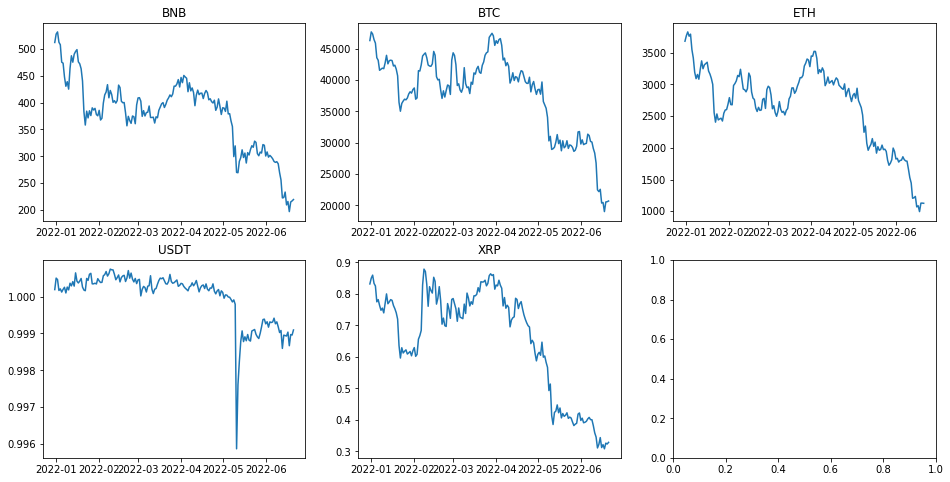

In [2]:
#stock data for discord bot to send to user

import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cryptocurrencies = ["BTC-USD", "ETH-USD","BNB-USD", "XRP-USD","USDT-USD" ]
crydata = yf.download(cryptocurrencies, start = '2021-12-31', end = '2022-06-21')

crydata.head()
cry_adjClose = crydata['Adj Close']
cry_adjClose.head()



fig, axis = plt.subplots( 2,3, figsize = (16,8), gridspec_kw= {'hspace':0.2, 'wspace': 0.2})
axis[0,0].plot(cry_adjClose['BNB-USD'])
axis[0,0].set_title('BNB')

axis[0,1].plot(cry_adjClose['BTC-USD'])
axis[0,1].set_title('BTC')

axis[0,2].plot(cry_adjClose['ETH-USD'])
axis[0,2].set_title('ETH')

axis[1,0].plot(cry_adjClose['USDT-USD'])
axis[1,0].set_title('USDT')

axis[1,1].plot(cry_adjClose['XRP-USD'])
axis[1,1].set_title('XRP')
overview = plt.show
plt.savefig("overview.jpg")

[*********************100%***********************]  2 of 2 completed


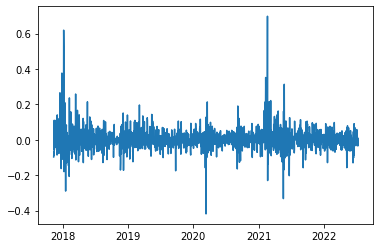

In [3]:
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt

now = datetime.now()
removeYear = now.year - 10
current_date = datetime.today().strftime('%Y-%m-%d')
date_arr = current_date.split('-')
past = str(removeYear) + '-' + date_arr[1] + '-' + date_arr[2]

crypto = ['BTC-USD', 'BNB-USD']
crydata1 = yf.download(crypto, start = past, end = now)
cry_adjclose = crydata1['Adj Close']

returns = cry_adjclose.pct_change().dropna(axis = 0)
plt.plot(returns["BNB-USD"])


In [4]:
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt

now = datetime.now()
removeYear = now.year - 10
current_date = datetime.today().strftime('%Y-%m-%d')
date_arr = current_date.split('-')
past = str(removeYear) + '-' + date_arr[1] + '-' + date_arr[2]

crypto = ['BTC-USD', 'BNB-USD']
crydata1 = yf.download(crypto, start = past, end = now)
cry_adjclose = crydata1['Adj Close']


returns = cry_adjclose.pct_change().dropna(axis = 0)
    
returns.head()   

[*********************100%***********************]  2 of 2 completed


,BNB-USD,BTC-USD
Date,,
2017-11-10,-0.097415,-0.073554
2017-11-11,-0.070329,-0.039368
2017-11-12,-0.090262,-0.064101
2017-11-13,0.109845,0.102422
2017-11-14,-0.055757,0.011626


[*********************100%***********************]  200 of 200 completed
[*********************100%***********************]  4 of 4 completed


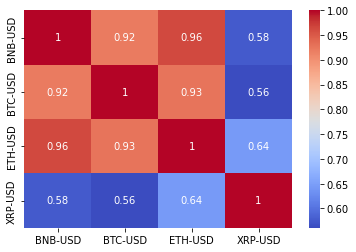

In [5]:
import os
import discord
from discord.ext import commands
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pycoingecko import CoinGeckoAPI
from datetime import datetime
from yahooquery import Screener
import yahoo_fin.stock_info as si

s = Screener()
data = s.get_screeners('all_cryptocurrencies_us', count=200)

dicts = data['all_cryptocurrencies_us']['quotes']
symbols = [d['symbol'] for d in dicts]
symbols

crydata = yf.download(symbols, start = past, end = now)
cry_adjclose = crydata['Adj Close']
now = datetime.now()
removeYear = now.year - 10
current_date = datetime.today().strftime('%Y-%m-%d')
date_arr = current_date.split('-')
past = str(removeYear) + '-' + date_arr[1] + '-' + date_arr[2]

def generate_heatmap(first, second, third, fourth):
    heat = [first, second, third, fourth]
    if first and second and third and fourth in symbols:
        heat_data = yf.download(heat, start = past, end =now)
        heat_corr = (((1 + heat_data['Adj Close'].pct_change()).cumprod() - 1) * 100).corr()
        sns.heatmap(heat_corr, annot = True, cmap = 'coolwarm')
        

generate_heatmap("BNB-USD", "ETH-USD", "BTC-USD", "XRP-USD")



In [6]:
s = Screener()
data = s.get_screeners('all_cryptocurrencies_us', count=200)

dicts = data['all_cryptocurrencies_us']['quotes']
symbols = [d['symbol'] for d in dicts]
symbols
i = None
j = None
k = None
l = None
sto = [i,j,k,l]






[*********************100%***********************]  200 of 200 completed
[*********************100%***********************]  4 of 4 completed
HeatMat


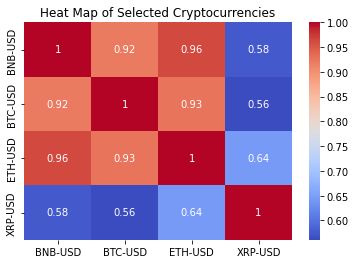

In [7]:
import os
import discord
from discord.ext import commands
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pycoingecko import CoinGeckoAPI
from datetime import datetime
from yahooquery import Screener
import yahoo_fin.stock_info as si

s = Screener()
data = s.get_screeners('all_cryptocurrencies_us', count=200)

dicts = data['all_cryptocurrencies_us']['quotes']
symbols = [d['symbol'] for d in dicts]
symbols


crydata = yf.download(symbols, start = past, end = now)
cry_adjclose = crydata['Adj Close']
now = datetime.now()
removeYear = now.year - 10
current_date = datetime.today().strftime('%Y-%m-%d')
date_arr = current_date.split('-')
past = str(removeYear) + '-' + date_arr[1] + '-' + date_arr[2]

def generate_heatmap(arr):
    heat = arr
    if arr[0] and arr[1] and arr[2] and arr[3] in symbols:
        heat_data = yf.download(heat, start = past, end =now)
        heat_corr = (((1 + heat_data['Adj Close'].pct_change()).cumprod() - 1) * 100).corr()
        sns.heatmap(heat_corr, annot = True, cmap = 'coolwarm')
        plt.title("Heat Map of Selected Cryptocurrencies")
        plt.savefig("HeatMap" +str(arr))
        return("HeatMat")


def split_string(string):
    return string.split(",")
    



input = "BNB-USD,BTC-USD,ETH-USD,XRP-USD"

str(split_string(input))
print(generate_heatmap(split_string(input)))

In [8]:
import os
import discord
from discord.ext import commands
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pycoingecko import CoinGeckoAPI
from datetime import datetime


import yahoo_fin.stock_info as si

s = Screener()
data = s.get_screeners('all_cryptocurrencies_us', count=200)

dicts = data['all_cryptocurrencies_us']['quotes']
symbols = [d['symbol'] for d in dicts]
symbols


crydata = yf.download(symbols, start = past, end = now)
cry_adjclose = crydata['Adj Close']
now = datetime.now()
removeYear = now.year - 10
current_date = datetime.today().strftime('%Y-%m-%d')
date_arr = current_date.split('-')
past = str(removeYear) + '-' + date_arr[1] + '-' + date_arr[2]

def generate_heatmap(arr):
    heat = arr
    if arr[0] and arr[1] and arr[2] and arr[3] in symbols:
        heat_data = yf.download(heat, start = past, end =now)
        heat_corr = (((1 + heat_data['Adj Close'].pct_change()).cumprod() - 1) * 100).corr()
        sns.heatmap(heat_corr, annot = True, cmap = 'coolwarm')
        plt.title("Heat Map of Selected Cryptocurrencies")
        plt.savefig("HeatMap" +str(arr))
        return("HeatMat")


input = "BNB-USD,BTC-USD,ETH-USD,XRP-USD"
def split_string(string):
    return string.split(",")

split_string(input)[0]

[*********************100%***********************]  200 of 200 completed


'BNB-USD'

In [9]:
from yahooquery import Screener
s = Screener()
data = s.get_screeners('all_cryptocurrencies_us', count=200)

dicts = data['all_cryptocurrencies_us']['quotes']
symbols = [d['symbol'] for d in dicts]
symbols

input = "BNB-USD,BTC-USD,ETH-USD,XRP-USD"
def split_string(string):
    return string.split(",")

def split(lst):
    for i in lst:
        a = [lst[0]]
        b = [lst[1]]
        c = [lst[2]]
        d = [lst[3]]
    return a, b, c, d
ans = split(split_string(input))

if ans in symbols:
    print("works")


In [10]:
import os
import discord
from discord.ext import commands
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pycoingecko import CoinGeckoAPI
from datetime import datetime


import yahoo_fin.stock_info as si

s = Screener()
data = s.get_screeners('all_cryptocurrencies_us', count=200)

dicts = data['all_cryptocurrencies_us']['quotes']
symbols = [d['symbol'] for d in dicts]
symbols

input = "BNB-USD,BTC-USD,ETH-USD,XRP-USD"
def split_string(string):
    return string.split(",")

if split_string(input)[0] in symbols and  split_string(input)[1] in symbols and split_string(input)[2] in symbols and \
        split_string(input)[3] in symbols:
        print("true")

true


[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  4 of 4 completed


"Moving_Average['BNB-USD', 'BTC-USD', 'ETH-USD', 'XRP-USD']"

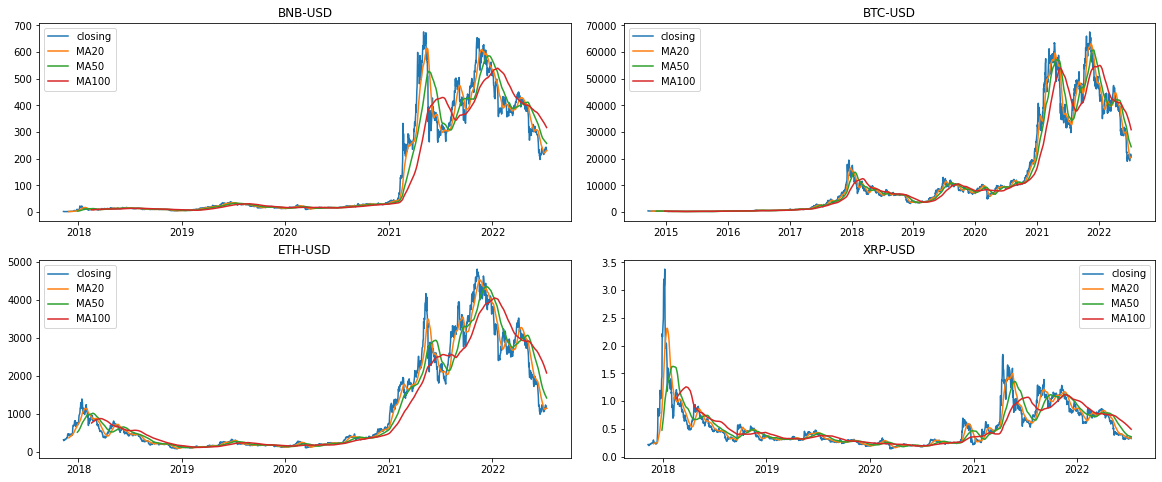

In [12]:
import os
import discord
from discord.ext import commands
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pycoingecko import CoinGeckoAPI
from datetime import datetime


import yahoo_fin.stock_info as si

s = Screener()
data = s.get_screeners('all_cryptocurrencies_us', count=200)

dicts = data['all_cryptocurrencies_us']['quotes']
symbols = [d['symbol'] for d in dicts]
symbols


def generate_moving_average(arr):
    mov_avg = arr
    if arr[0] and arr[1] and arr[2] and arr[3] in symbols:
        mov_avg_data = yf.download(mov_avg,start = past, end = now)
        MA20 = mov_avg_data['Adj Close'].rolling(20).mean()
        MA50 = mov_avg_data['Adj Close'].rolling(50).mean()
        MA100 = mov_avg_data['Adj Close'].rolling(100).mean()

        mov_adjClose = mov_avg_data['Adj Close']
            
        mov_avg = arr
        if arr[0] and arr[1] and arr[2] and arr[3] in symbols:
            mov_avg_data = yf.download(mov_avg,start = past, end = now)
            MA20 = mov_avg_data['Adj Close'].rolling(20).mean()
            MA50 = mov_avg_data['Adj Close'].rolling(50).mean()
            MA100 = mov_avg_data['Adj Close'].rolling(100).mean()

            mov_adjClose = mov_avg_data['Adj Close']
            
            fig, axs = plt.subplots(2,2,figsize=(20,8),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
            axs[0,0].plot(mov_adjClose[arr[0]], label = 'closing')
            axs[0,0].plot(MA20[arr[0]], label = 'MA20')
            axs[0,0].plot(MA50[arr[0]], label = 'MA50')
            axs[0,0].plot(MA100[arr[0]], label = 'MA100')
            axs[0,0].set_title(arr[0])
            axs[0,0].legend()

            axs[0,1].plot(mov_adjClose[arr[1]], label = 'closing')
            axs[0,1].plot(MA20[arr[1]], label = 'MA20')
            axs[0,1].plot(MA50[arr[1]], label = 'MA50')
            axs[0,1].plot(MA100[arr[1]], label = 'MA100')
            axs[0,1].set_title(arr[1])
            axs[0,1].legend()

            axs[1,0].plot(mov_adjClose[arr[2]], label = 'closing')
            axs[1,0].plot(MA20[arr[2]], label = 'MA20')
            axs[1,0].plot(MA50[arr[2]], label = 'MA50')
            axs[1,0].plot(MA100[arr[2]], label = 'MA100')
            axs[1,0].set_title(arr[2])
            axs[1,0].legend()

            axs[1,1].plot(mov_adjClose[arr[3]], label = 'closing')
            axs[1,1].plot(MA20[arr[3]], label = 'MA20')
            axs[1,1].plot(MA50[arr[3]], label = 'MA50')
            axs[1,1].plot(MA100[arr[3]], label = 'MA100')
            axs[1,1].set_title(arr[3])
            axs[1,1].legend()

            plt.savefig("Moving_Average")
            return("Moving_Average" + str(str(arr)))
test_arr = ["BNB-USD","BTC-USD","ETH-USD","XRP-USD"]
generate_moving_average(test_arr)